## Visualize Top 10 Covid-19 Daily New Cases for the Past 60 Days

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

countries = 10
window = 60
font_size = 14

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


df['Country/Region'] = df['Country/Region'].str.cat(df['Province/State'], sep=' ', na_rep='')
df['Country/Region'] = df['Country/Region'].str.rstrip(' ')
df.index = df['Country/Region']
df = df.drop(['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)
df = df.diff(periods=1, axis=1)
df = df.rolling(7, axis=1).mean()
last_date = df.columns[-1]
df = df.sort_values([last_date], ascending=False)
df = df.T
df = df[df.columns[:countries]]
df.tail(5)

Country/Region,Japan,US,"Korea, South",Russia,Taiwan*,Germany,France,Italy,China Hong Kong,Brazil
9/5/22,128676.428571,63920.000000,80571.142857,45826.142857,32150.000000,28811.857143,14669.571429,18574.428571,9994.285714,11476.285714
9/6/22,122909.285714,68883.285714,77937.571429,46046.714286,32896.571429,35454.000000,15126.142857,17683.142857,10069.285714,9075.428571
9/7/22,117230.142857,64477.000000,76666.142857,46271.000000,33849.285714,28790.857143,15255.000000,17076.857143,10169.142857,6812.285714
9/8/22,111878.428571,65331.428571,73789.142857,46395.000000,33988.714286,29085.857143,15429.285714,16622.428571,10241.285714,6812.285714
9/9/22,107482.285714,71220.428571,68517.857143,46558.000000,34049.142857,29203.142857,16849.571429,16105.857143,10266.285714,8656.285714


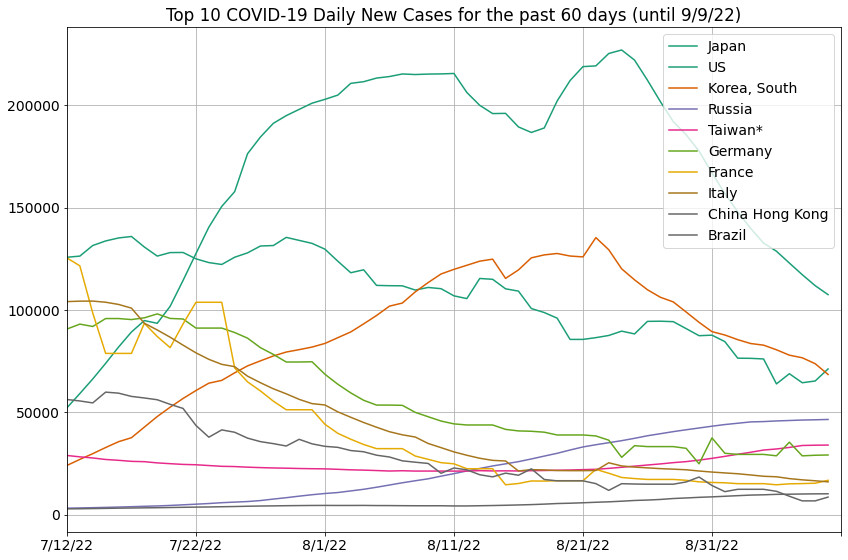

In [3]:
plt.rcParams['font.size'] = font_size
df[-window:].plot(figsize=(12, 8), fontsize=font_size, grid=True, colormap='Dark2', 
                  title=f'Top {countries} COVID-19 Daily New Cases for the past {window} days (until {last_date})')
plt.xlim([0, window])
plt.legend(fontsize=font_size)
plt.tight_layout()
plt.show()